In [31]:
import pandas as pd
import numpy as np
import nltk

## 1. Load the tweets file using read_csv function from Pandas package. 


In [32]:
df= pd.read_csv(r"C:\Users\Sharon & Floyd\Downloads\AI files\NLP\TwitterHate.csv")

In [33]:
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [35]:
df.tweet[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

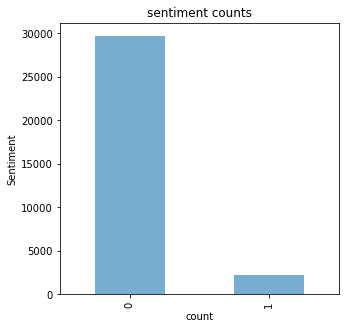

In [36]:
import matplotlib.pyplot as plt
plt.title ("sentiment counts")
plt.xlabel ('count')
plt.ylabel ('Sentiment')
df['label'].value_counts().plot(kind='bar',alpha=0.6, figsize=(5,5))
plt.show()

In [37]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64


## 2. Get the tweets into a list for easy text cleanup and manipulation.



In [38]:
text =[]
for i in df.tweet:
    text.append(i)
    
text

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

## 3.1 Normalize the casing.

In [39]:
text_lwr=[x.lower() for x in text]

In [40]:
text_lwr

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

## 3.2 Using regular expressions, remove user handles. These begin with '@’.

In [41]:
import re
text_handler= [re.sub("@\w+","", handler) for handler in text_lwr]

In [42]:
text_handler

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 '  camping tomorrow        dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 "   welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #

## 3.3 Using regular expressions, remove URLs.

### testing code on an example

In [43]:
re.sub(r'https?://\S+', '', "@go on this website to test! http://google.come/pictures/text")



'@go on this website to test! '

In [44]:
text_url= [re.sub(r'https?://\S+', '', url) for url in text_handler]


## 3.4 Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

In [45]:
from nltk.tokenize import TweetTokenizer
token= TweetTokenizer()

In [46]:
text_token = [token.tokenize(sent) for sent in text_url]
text_token

[['when',
  'a',
  'father',
  'is',
  'dysfunctional',
  'and',
  'is',
  'so',
  'selfish',
  'he',
  'drags',
  'his',
  'kids',
  'into',
  'his',
  'dysfunction',
  '.',
  '#run'],
 ['thanks',
  'for',
  '#lyft',
  'credit',
  'i',
  "can't",
  'use',
  'cause',
  'they',
  "don't",
  'offer',
  'wheelchair',
  'vans',
  'in',
  'pdx',
  '.',
  '#disapointed',
  '#getthanked'],
 ['bihday', 'your', 'majesty'],
 ['#model',
  'i',
  'love',
  'u',
  'take',
  'with',
  'u',
  'all',
  'the',
  'time',
  'in',
  'urð',
  '\x9f',
  '\x93',
  '±',
  '!',
  '!',
  '!',
  'ð',
  '\x9f',
  '\x98',
  '\x99',
  'ð',
  '\x9f',
  '\x98',
  '\x8e',
  'ð',
  '\x9f',
  '\x91',
  '\x84',
  'ð',
  '\x9f',
  '\x91',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦'],
 ['factsguide', ':', 'society', 'now', '#motivation'],
 ['[',
  '2/2',
  ']',
  'huge',
  'fan',
  'fare',
  'and',
  'big',
  'talking',
  'before',
  'they',
  'leave',
  '.',
  'chao

### 3.5 Remove stop words.

In [47]:
from nltk.corpus import stopwords

In [48]:
text_stopword = []
stop_words = set(stopwords.words('english'))
for List in range (len (text_token)):
    List1 = []
    for word in range (len (text_token[List])):
        if text_token[List][word] not in stop_words:
            List1.append (text_token[List][word])
    text_stopword.append(List1)
text_stopword

[['father',
  'dysfunctional',
  'selfish',
  'drags',
  'kids',
  'dysfunction',
  '.',
  '#run'],
 ['thanks',
  '#lyft',
  'credit',
  "can't",
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  '.',
  '#disapointed',
  '#getthanked'],
 ['bihday', 'majesty'],
 ['#model',
  'love',
  'u',
  'take',
  'u',
  'time',
  'urð',
  '\x9f',
  '\x93',
  '±',
  '!',
  '!',
  '!',
  'ð',
  '\x9f',
  '\x98',
  '\x99',
  'ð',
  '\x9f',
  '\x98',
  '\x8e',
  'ð',
  '\x9f',
  '\x91',
  '\x84',
  'ð',
  '\x9f',
  '\x91',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦'],
 ['factsguide', ':', 'society', '#motivation'],
 ['[',
  '2/2',
  ']',
  'huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  '.',
  'chaos',
  'pay',
  'disputes',
  'get',
  '.',
  '#allshowandnogo'],
 ['camping', 'tomorrow', 'dannyâ', '\x80', '¦'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  '.',
  'ð',
  '\x9f',
  '\x98',
  '¯',
  "can't",
 

## 3.6 Remove redundant terms like ‘amp’, ‘rt’, etc.

In [49]:
redundant_words = ['rt', 'amp']
test = ['this','is', 'a', 'rt', 'amp', 'test', 'phrase']
text_redundant = [word for word in test if not word in redundant_words]
text_redundant

['this', 'is', 'a', 'test', 'phrase']

In [50]:
text_redundant = []
for List in range (len (text_stopword)):
    List1 = []
    for word in range (len (text_stopword[List])):
        if text_stopword[List][word] not in redundant_words:
            List1.append (text_stopword[List][word])
    text_redundant.append(List1)
text_redundant

[['father',
  'dysfunctional',
  'selfish',
  'drags',
  'kids',
  'dysfunction',
  '.',
  '#run'],
 ['thanks',
  '#lyft',
  'credit',
  "can't",
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  '.',
  '#disapointed',
  '#getthanked'],
 ['bihday', 'majesty'],
 ['#model',
  'love',
  'u',
  'take',
  'u',
  'time',
  'urð',
  '\x9f',
  '\x93',
  '±',
  '!',
  '!',
  '!',
  'ð',
  '\x9f',
  '\x98',
  '\x99',
  'ð',
  '\x9f',
  '\x98',
  '\x8e',
  'ð',
  '\x9f',
  '\x91',
  '\x84',
  'ð',
  '\x9f',
  '\x91',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦'],
 ['factsguide', ':', 'society', '#motivation'],
 ['[',
  '2/2',
  ']',
  'huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  '.',
  'chaos',
  'pay',
  'disputes',
  'get',
  '.',
  '#allshowandnogo'],
 ['camping', 'tomorrow', 'dannyâ', '\x80', '¦'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  '.',
  'ð',
  '\x9f',
  '\x98',
  '¯',
  "can't",
 

## 3.7 Remove ‘#’ symbols from the tweet while retaining the term.

In [51]:
text_hash = []
Hash = ['#']
for List in range (len (text_redundant)):
    List1 = []
    for word in range (len (text_redundant[List])):
        L=str()
        for letter in range (len(text_redundant[List][word])):
            if text_redundant[List][word][letter] not in Hash:
                L = L + text_redundant[List][word][letter]
        List1.append (L)
    text_hash.append(List1)
text_hash 



[['father',
  'dysfunctional',
  'selfish',
  'drags',
  'kids',
  'dysfunction',
  '.',
  'run'],
 ['thanks',
  'lyft',
  'credit',
  "can't",
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  '.',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model',
  'love',
  'u',
  'take',
  'u',
  'time',
  'urð',
  '\x9f',
  '\x93',
  '±',
  '!',
  '!',
  '!',
  'ð',
  '\x9f',
  '\x98',
  '\x99',
  'ð',
  '\x9f',
  '\x98',
  '\x8e',
  'ð',
  '\x9f',
  '\x91',
  '\x84',
  'ð',
  '\x9f',
  '\x91',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦',
  'ð',
  '\x9f',
  '\x92',
  '¦'],
 ['factsguide', ':', 'society', 'motivation'],
 ['[',
  '2/2',
  ']',
  'huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  '.',
  'chaos',
  'pay',
  'disputes',
  'get',
  '.',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'dannyâ', '\x80', '¦'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  '.',
  'ð',
  '\x9f',
  '\x98',
  '¯',
  "can't",
  'think

## 4. Extra cleanup by removing terms with a length of 1.

In [52]:
text_len  = []
for List in range (len (text_hash)):
    List1 = []
    for word in range (len (text_hash[List])):
        if len (text_hash[List][word]) > 1:
            List1.append (text_hash[List][word])
    text_len .append(List1)
text_len 

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  "can't",
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'take', 'time', 'urð'],
 ['factsguide', 'society', 'motivation'],
 ['2/2',
  'huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'disputes',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'dannyâ'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  "can't",
  'think',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', "i'm", 'gr8'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  '0.2',
  '0.5',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando

## 5. Check out the top terms in the tweets:

## 5.1 First, get all the tokenized terms into one large list.

In [53]:
text_len[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

In [54]:
List_tweets = [" ".join(sent) for sent in text_len]
List_tweets

['father dysfunctional selfish drags kids dysfunction run',
 "thanks lyft credit can't use cause offer wheelchair vans pdx disapointed getthanked",
 'bihday majesty',
 'model love take time urð',
 'factsguide society motivation',
 '2/2 huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow dannyâ',
 "next school year year exams can't think school exams hate imagine actorslife revolutionschool girl",
 'love land allin cavs champions cleveland clevelandcavaliers',
 "welcome i'm gr8",
 'ireland consumer price index mom climbed previous 0.2 0.5 may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'get see daddy today 80days gettingfed',
 'cnn calls michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouch ... junior angryð got7 junior yugyoem omg',
 'thankful paner thankful positiv

## 5.2 Use the counter and find the 10 most common terms.

In [55]:
from collections import Counter
List_common = []
for sent in text_len:
    List_common.extend(sent)

print (Counter(List_common).most_common(10))

[('...', 2810), ('love', 2748), ('day', 2276), ('happy', 1684), ('time', 1131), ('life', 1118), ('like', 1047), ("i'm", 1018), ('today', 1013), ('new', 994)]


## 6. Data formatting for predictive modeling:

## 6.1 Join the tokens back to form strings. This will be required for the vectorizers. we will also lemmatize the words

In [57]:
text = [token.tokenize(sent) for sent in List_tweets]

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
text_cleaned =[]

for List in range (len (text)):
    text_cleaned.append(" ".join([ lem.lemmatize(x) for x in text[List]]))
    
text_cleaned

['father dysfunctional selfish drag kid dysfunction run',
 "thanks lyft credit can't use cause offer wheelchair van pdx disapointed getthanked",
 'bihday majesty',
 'model love take time urð',
 'factsguide society motivation',
 '2/2 huge fan fare big talking leave chaos pay dispute get allshowandnogo',
 'camping tomorrow dannyâ',
 "next school year year exam can't think school exam hate imagine actorslife revolutionschool girl",
 'love land allin cavs champion cleveland clevelandcavaliers',
 "welcome i'm gr8",
 'ireland consumer price index mom climbed previous 0.2 0.5 may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 'get see daddy today 80days gettingfed',
 'cnn call michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouch ... junior angryð got 7 junior yugyoem omg',
 'thankful paner thankful positive',
 're

### Applying TF-IDF.  Instantiate with a maximum of 5000 terms in your vocabulary.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,3),max_features = 5000)

In [62]:
X = vectorizer.fit_transform(text_cleaned)
Y = df.label.values

## 6.3 Perform train_test_split using sklearn.

In [64]:
from sklearn.model_selection import train_test_split
x_train_vec, x_test_vec, y_train, y_test = train_test_split(X, Y, random_state=10)

## 8. Model building: Ordinary Logistic Regression

## 8.1 Instantiate Logistic Regression from sklearn with default parameters.

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

## 8.2 Fit into the train data.

In [84]:
LR.fit(x_train_vec, y_train)

LogisticRegression()

## 8.3 Make predictions for the train and the test set.

In [85]:
y_train_pred = LR.predict(x_train_vec)
y_test_pred = LR.predict(x_test_vec)

## 9. Model evaluation: Accuracy, recall, and f_1 score.

## 9.1 Report the accuracy on the train set.

In [86]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_train, y_train_pred))

0.9397188269158566


## 9.2 Report the recall on the train set: decent, high, or low.

In [87]:
from sklearn.metrics import recall_score
score = recall_score (y_train, y_train_pred)
print (score)
if score < 0.4:
    print ('Recall score is low')
if score > 0.4 and score <0.7:
    print ('Recall score is decent')
if score > 0.7:
    print ('Recall score is high')
    

0.13815789473684212
Recall score is low


## 9.3 Get the f1 score on the train set.

In [88]:
from sklearn.metrics import f1_score
print (f1_score(y_train, y_train_pred))

0.24226533822758264


## 10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

## 10.1 Adjust the appropriate class in the LogisticRegression model.

In [89]:
LR_balance = LogisticRegression(class_weight="balanced")

## 11. Train again with the adjustment and evaluate.

## 11.1 Train the model on the train set.

In [90]:
LR_balance.fit(x_train_vec, y_train)
y_train_pred= LR_balance.predict(x_train_vec)

## 11.2 Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [91]:
print ('ACCURACY:',accuracy_score(y_train, y_train_pred))
score = recall_score (y_train, y_train_pred)
print ('Recall:',score)
if score < 0.4:
    print ('Recall score is low')
if score > 0.4 and score <0.7:
    print ('Recall score is decent')
if score > 0.7:
    print ('Recall score is high')
print ('f1:',f1_score(y_train, y_train_pred))

ACCURACY: 0.9259104751574819
Recall: 0.4007177033492823
Recall score is decent
f1: 0.4300385109114249


## 12. Regularization and Hyperparameter tuning:

## 12.1 Import GridSearch and StratifiedKFold because of class imbalance.

In [92]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## 12.2 Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

In [93]:
param_grid = {'C': [1, 10, 100, 1000], 'penalty' : ['l1', 'l2']}


## 12.3 Use a balanced class weight while instantiating the logistic regression.

In [94]:
LR_grid = LogisticRegression(class_weight="balanced")

## 13. Find the parameters with the best recall in cross validation.

## 13.1 Choose ‘recall’ as the metric for scoring.

## 13.2 Choose stratified 4 fold cross validation scheme.

## 13.3 Fit into  the train set.

In [95]:
grid_search = GridSearchCV(estimator = LR_grid, 
             param_grid = param_grid, 
             cv = StratifiedKFold(n_splits = 4), 
             n_jobs = -1, 
             verbose = 1, 
             scoring = "recall" )
grid_search.fit(x_train_vec, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.4s finished
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

## 14 What are the best parameters?

In [96]:
grid_search.best_estimator_

LogisticRegression(C=10, class_weight='balanced')

## 15 Predict and evaluate using the best estimator.

## 15.1 Use the best estimator from the grid search to make predictions on the test set.

In [97]:
LR_best_param =  LogisticRegression(C=1, class_weight='balanced')

In [98]:
LR_best_param.fit(x_train_vec, y_train)
y_train_pred= LR_best_param.predict(x_train_vec)

## 15.2 What is the recall on the test set for the toxic comments?

## 15.3 What is the f_1 score?

In [99]:
print ('ACCURACY:',accuracy_score(y_train, y_train_pred))
score = recall_score (y_train, y_train_pred)
print ('Recall:',score)
if score < 0.4:
    print ('Recall score is low')
if score > 0.4 and score <0.7:
    print ('Recall score is decent')
if score > 0.7:
    print ('Recall score is high')
print ('f1:',f1_score(y_train, y_train_pred))

ACCURACY: 0.9259104751574819
Recall: 0.4007177033492823
Recall score is decent
f1: 0.4300385109114249
